In [ ]:
import pandas as pd

In [ ]:
!pip install dython

In [ ]:
train_data = pd.read_csv('train_data.txt')
train_data = train_data.rename(columns={'Location.Address.PostalCode': 'Zip'})
train_data['Zip'] = train_data['Zip'].astype(str).str[:5].astype(int)

<ipython-input-169-e95304ec0e36>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.txt')


In [ ]:
df_income = pd.read_excel('income.xlsx')
df_income

,Rank,Median Household Income ▼,Zip / Population
0,1,"$179,922","60043 / 2,648"
1,2,"$172,539","60022 / 8,383"
2,3,"$166,667",60029 / 478
3,4,"$157,212","60521 / 17,678"
4,5,"$155,750",60604 / 419
...,...,...,...
1362,1363,"$16,706","62914 / 2,969"
1363,1364,"$16,500","62204 / 8,612"
1364,1365,"$14,513","62701 / 1,045"
1365,1366,"$14,432",62059 / 807


In [ ]:
print(df_income.columns)

Index(['Rank', 'Median Household Income ▼', 'Zip / Population'], dtype='object')


In [ ]:
df_income['Zip / Population'] = df_income['Zip / Population'].str[:5]
df_income= df_income.drop(columns=['Rank'])

In [ ]:
df_income = df_income.rename(columns={'Zip / Population': 'Zip'})
df_income = df_income.rename(columns={'Median Household Income ▼': 'Median Household Income'})
df_income['Zip'] = df_income['Zip'].astype(int)

In [ ]:
df_income['Median Household Income'] = (
    df_income['Median Household Income']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(int)  )

In [ ]:
df_income

,Median Household Income,Zip
0,179922,60043
1,172539,60022
2,166667,60029
3,157212,60521
4,155750,60604
...,...,...
1362,16706,62914
1363,16500,62204
1364,14513,62701
1365,14432,62059


In [ ]:
train_data = pd.merge(train_data, df_income, on='Zip', how='left')
train_data.to_csv('data_with_income.csv', index=False)

# Preprocessing

In [ ]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)

In [ ]:
# extra imports
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from statsmodels.genmod.generalized_linear_model import GLM


#BASIC INSPECTION OF THE DATASET

In [ ]:
train_data.describe()

,Characteristics.LotSizeSquareFeet,ImageData.c1c6.summary.bathroom,ImageData.c1c6.summary.exterior,ImageData.c1c6.summary.interior,ImageData.c1c6.summary.kitchen,ImageData.c1c6.summary.property,ImageData.q1q6.summary.bathroom,ImageData.q1q6.summary.exterior,ImageData.q1q6.summary.interior,ImageData.q1q6.summary.kitchen,...,Structure.FireplacesTotal,Structure.GarageSpaces,Structure.LivingArea,Characteristics.SurfaceArea,Structure.NewConstructionYN,Structure.Parking,Structure.ParkingFeatures,Structure.Rooms.RoomsTotal,Structure.YearBuilt,Median Household Income
count,9.090e+02,102779.000,102779.000,102779.000,102779.000,102779.000,101522.000,101522.000,101522.000,101522.000,...,106344.000,88621.000,91696.000,9.257e+04,106344.000,106344.000,106344.000,105049.000,101360.000,106129.000
mean,5.190e+04,3.150,3.260,3.223,3.146,3.183,3.337,3.436,3.143,3.241,...,0.481,2.040,1890.558,2.382e+03,0.044,1.772,0.127,7.176,1969.521,68906.991
std,4.737e+05,0.745,0.675,0.699,0.764,0.682,0.529,0.601,0.563,0.654,...,0.500,8.543,1068.540,4.719e+04,0.205,7.824,0.334,2.846,48.941,24494.922
min,0.000e+00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,360.000,8.000e+00,0.000,0.000,0.000,0.000,0.000,8993.000
25%,3.600e+03,2.800,3.000,3.000,2.800,2.900,3.000,3.000,2.800,2.800,...,0.000,1.000,1200.000,1.200e+03,0.000,1.000,0.000,5.000,1953.000,51732.000
50%,8.350e+03,3.200,3.300,3.300,3.200,3.200,3.300,3.500,3.100,3.300,...,0.000,2.000,1623.000,1.632e+03,0.000,2.000,0.000,7.000,1974.000,68397.000
75%,2.202e+04,3.600,3.700,3.600,3.600,3.600,3.700,3.900,3.500,3.800,...,1.000,2.000,2277.000,2.300e+03,0.000,2.000,0.000,8.000,1998.000,83104.000
max,1.000e+07,6.000,6.000,6.000,6.000,6.000,5.200,5.400,5.200,5.200,...,1.000,999.000,51400.000,1.000e+07,1.000,999.000,1.000,99.000,2024.000,179922.000


In [ ]:
train_data.shape

(106344, 38)

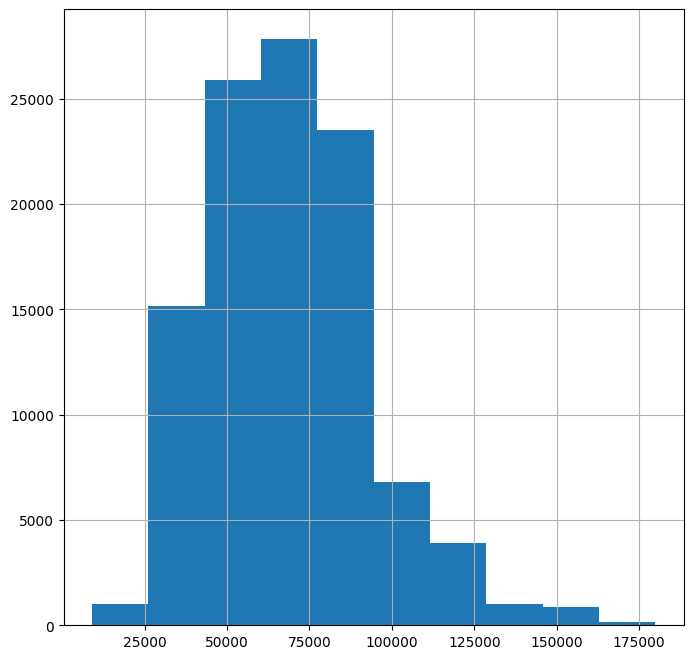

In [ ]:
train_data['Median Household Income'].hist(figsize=(8,8));

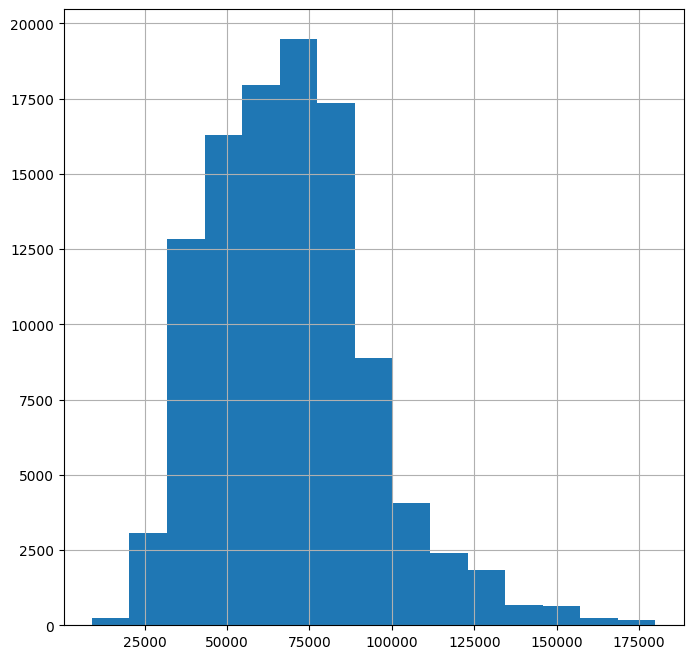

In [ ]:
train_data['Median Household Income'][(train_data['Median Household Income']!=99999999)&
              (train_data['Median Household Income']!=0)].hist(bins=15,figsize=(8,8));

In [ ]:
train_data['Median Household Income'].describe()

,Median Household Income
count,106129.000
mean,68906.991
std,24494.922
min,8993.000
25%,51732.000
50%,68397.000
75%,83104.000
max,179922.000


In [ ]:
train_data['Listing.Price.ClosePrice'].describe()

,Listing.Price.ClosePrice
count,1.063e+05
mean,3.902e+05
std,3.805e+05
min,1.000e+00
25%,2.090e+05
50%,3.100e+05
75%,4.514e+05
max,3.555e+07


#Preprocessing

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

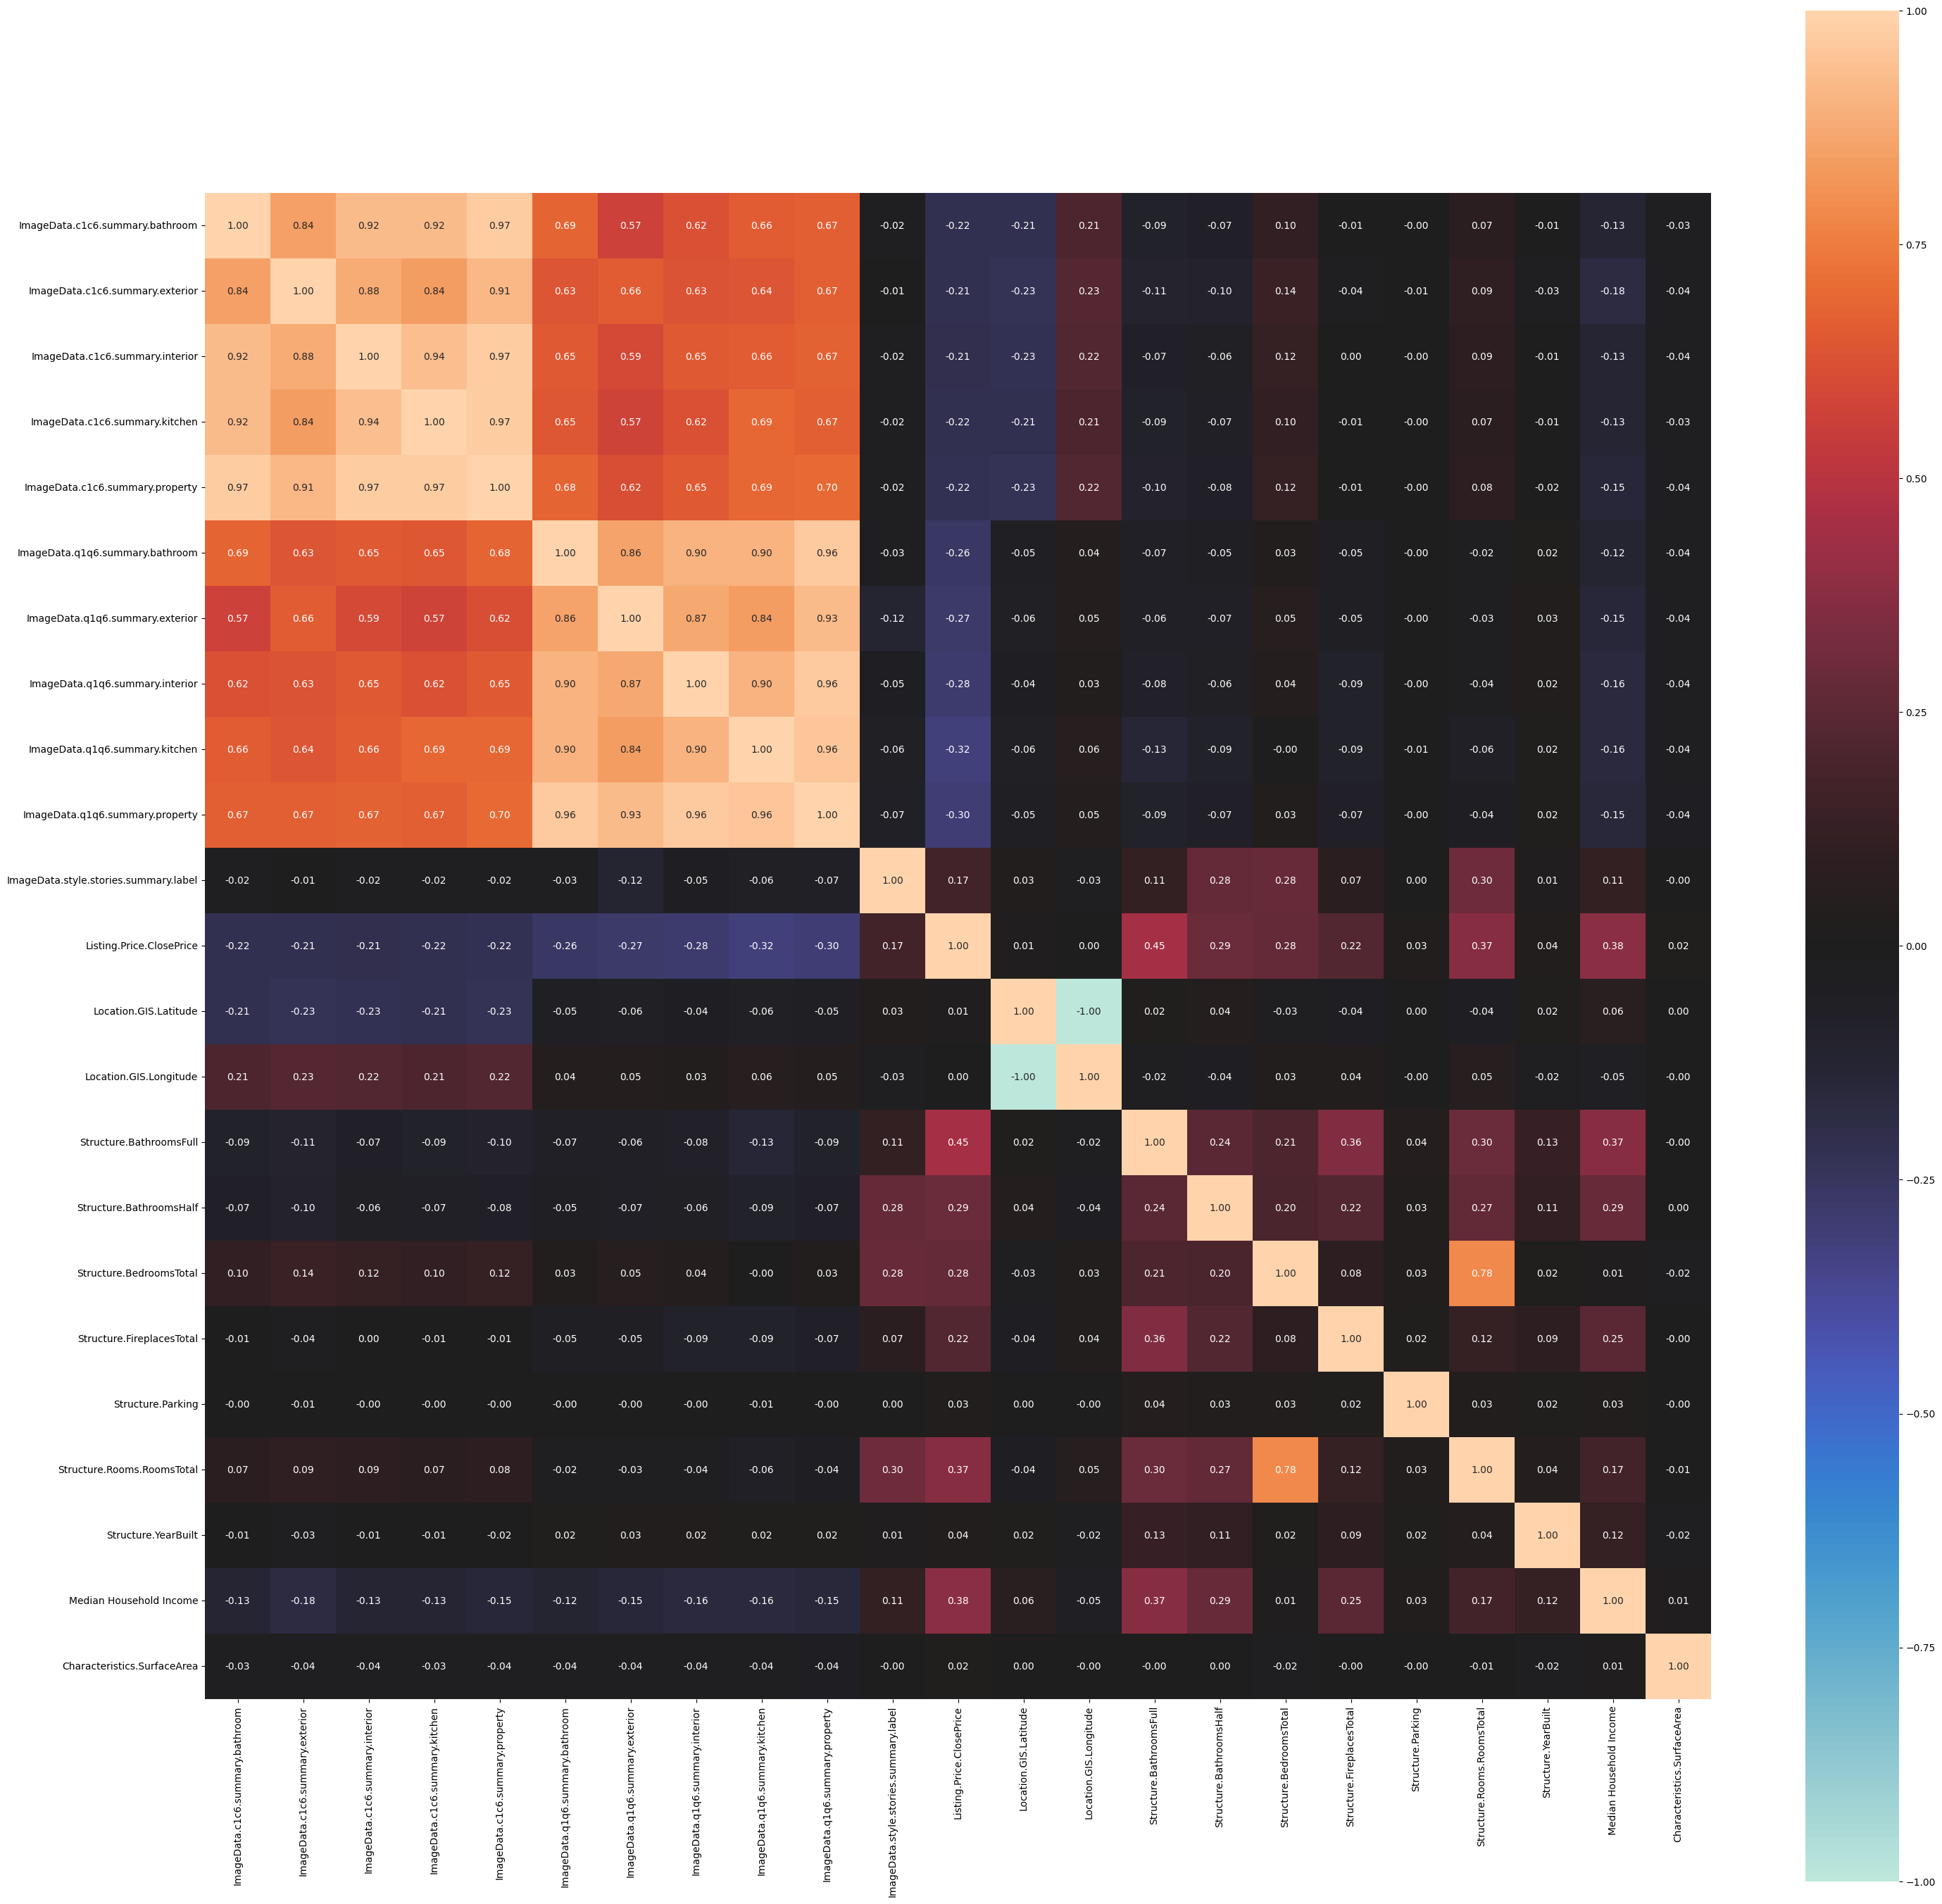

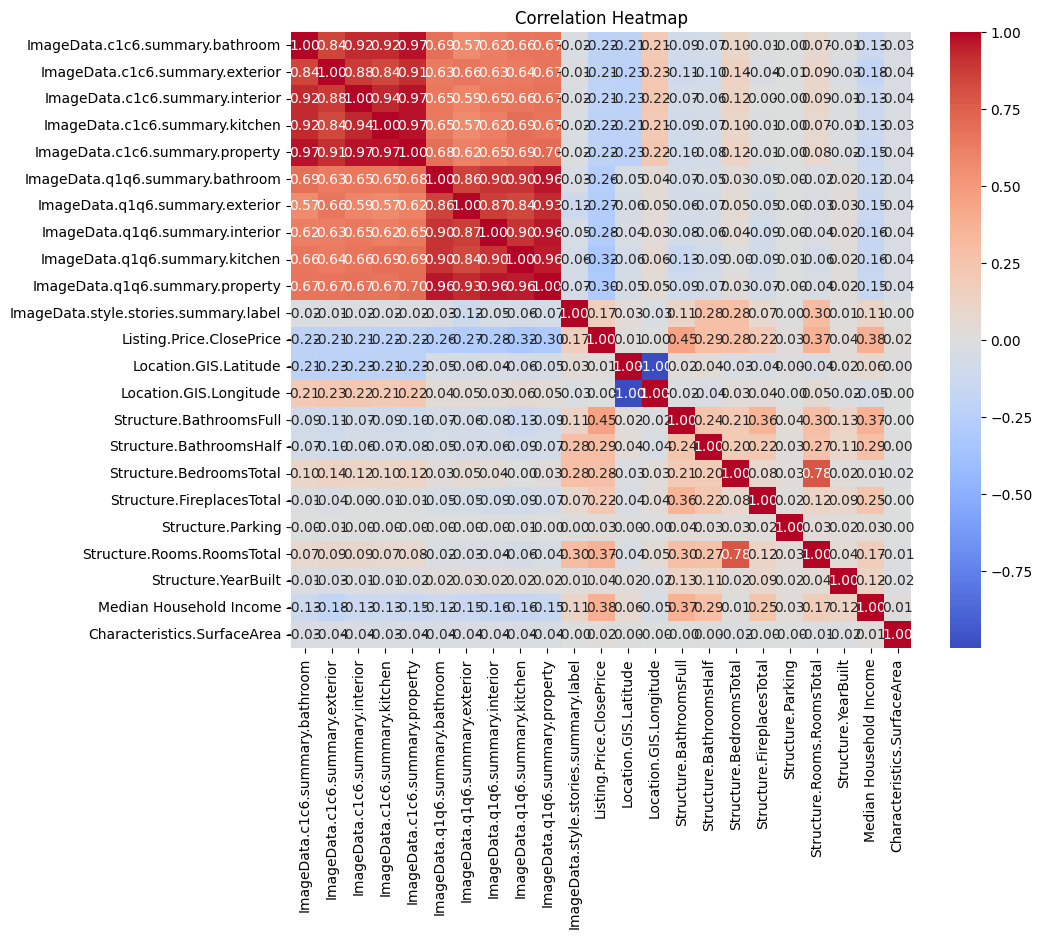

In [ ]:
from dython.nominal import associations
from dython.nominal import correlation_ratio
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = [
    	"ImageData.c1c6.summary.bathroom",
    	"ImageData.c1c6.summary.exterior",
    	"ImageData.c1c6.summary.interior",
    	"ImageData.c1c6.summary.kitchen",
    	"ImageData.c1c6.summary.property",
    	"ImageData.q1q6.summary.bathroom",
    	"ImageData.q1q6.summary.exterior",
    	"ImageData.q1q6.summary.interior",
    	"ImageData.q1q6.summary.kitchen",
    	"ImageData.q1q6.summary.property",
    	"ImageData.style.stories.summary.label",
    	"Listing.Price.ClosePrice",
    	"Location.GIS.Latitude",
    	"Location.GIS.Longitude",
    	"Structure.BathroomsFull",
    	"Structure.BathroomsHalf",
    	"Structure.BedroomsTotal",
    	"Structure.FireplacesTotal",
    	"Structure.Parking",
    	"Structure.Rooms.RoomsTotal",
    	"Structure.YearBuilt",
	"Median Household Income",
	    'Characteristics.SurfaceArea'
	]

associations_result = associations(train_data[numerical_columns], nominal_columns='auto', plot=False)

correlation_matrix = associations_result['corr']

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
train_data = train_data.drop(["ImageData.c1c6.summary.bathroom", "ImageData.c1c6.summary.exterior", "ImageData.c1c6.summary.interior",	"ImageData.c1c6.summary.kitchen",
    	"ImageData.q1q6.summary.bathroom", "ImageData.q1q6.summary.exterior", "ImageData.q1q6.summary.interior", "ImageData.q1q6.summary.kitchen",
    	"Location.GIS.Latitude", "Location.GIS.Longitude", "Characteristics.LotSizeSquareFeet", "Structure.GarageSpaces", "Structure.LivingArea",
			"Structure.ParkingFeatures", "Structure.YearBuilt", 'Location.Address.StreetSuffix'], axis=1)

train_data.head()

,ImageData.c1c6.summary.property,ImageData.features_reso.results,ImageData.q1q6.summary.property,ImageData.room_type_reso.results,ImageData.style.stories.summary.label,Listing.Dates.CloseDate,Listing.Price.ClosePrice,Location.Address.City,Zip,Property.PropertyType,...,Structure.BathroomsHalf,Structure.BedroomsTotal,Structure.Cooling,Structure.FireplacesTotal,Structure.Heating,Characteristics.SurfaceArea,Structure.NewConstructionYN,Structure.Parking,Structure.Rooms.RoomsTotal,Median Household Income
0,NaN,"['Cooling.CeilingFans', 'Flooring.Carpet', 'Fl...",NaN,"['Other', 'FrontOfStructure', 'Basement', 'Sta...",1.0,2023,3.000e+04,morrison,61270,commercial sale,...,0,0,['central air'],0,NaN,3200.0,0,0.0,NaN,55161.0
1,3.8,"['Appliances.GasRange', 'Appliances.Range', 'A...",4.0,"['SideOfStructure', 'Other', 'Kitchen', 'Office']",1.0,2023,3.990e+05,highland park,60035,residential,...,1,1,['window/wall unit - 1'],0,['natural gas'],3175.0,0,1.0,6.0,115372.0
2,NaN,"['Flooring.Carpet', 'ParkingFeatures.Garage', ...",NaN,"['Community', 'FrontOfStructure', 'Other', 'Ga...",2.0,2023,2.050e+06,chicago,60618,commercial sale,...,0,0,['central air'],0,NaN,18750.0,0,0.0,NaN,56763.0
3,NaN,"['CommunityFeatures.Lake', 'WaterfrontFeatures...",NaN,"['Yard', 'View']",1.0,2023,1.620e+05,wilmington,60481,farm,...,0,0,NaN,0,NaN,NaN,0,0.0,NaN,58821.0
4,3.6,"['Appliances.Refrigerator', 'Appliances.Microw...",4.2,"['FrontOfStructure', 'BackOfStructure', 'Commu...",1.0,2023,3.225e+06,maple park,60151,residential,...,0,2,"['partial', 'none']",0,['other'],NaN,0,1.0,4.0,63008.0


In [ ]:
train_data['ImageData.c1c6.summary.property'] = train_data['ImageData.c1c6.summary.property'].fillna(train_data['ImageData.c1c6.summary.property'].mean())
train_data['ImageData.q1q6.summary.property'] = train_data['ImageData.q1q6.summary.property'].fillna(train_data['ImageData.q1q6.summary.property'].mean())
train_data['Structure.Rooms.RoomsTotal'] = train_data['Structure.Rooms.RoomsTotal'].fillna(train_data['Structure.Rooms.RoomsTotal'].mean())

In [ ]:
train_data['ImageData.features_reso.results'].head(10)

,ImageData.features_reso.results
0,"['Cooling.CeilingFans', 'Flooring.Carpet', 'Fl..."
1,"['Appliances.GasRange', 'Appliances.Range', 'A..."
2,"['Flooring.Carpet', 'ParkingFeatures.Garage', ..."
3,"['CommunityFeatures.Lake', 'WaterfrontFeatures..."
4,"['Appliances.Refrigerator', 'Appliances.Microw..."
5,NaN
6,['Levels.Two']
7,"['Appliances.Refrigerator', 'CommunityFeatures..."
8,NaN
9,NaN


Preprocessing of the categorical features

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
import ast

# List of the categorical columns that are structure as a list of strings
columns_to_transform = ['ImageData.features_reso.results', 'ImageData.room_type_reso.results',
                        'Structure.Heating', 'Structure.Cooling']

# Separate each list
for col in columns_to_transform:
    train_data[col] = [
        ast.literal_eval(sublist) if isinstance(sublist, str) else []
        for sublist in train_data[col]
    ]

print(train_data[columns_to_transform].head())

                     ImageData.features_reso.results  \
0  [Cooling.CeilingFans, Flooring.Carpet, Floorin...   
1  [Appliances.GasRange, Appliances.Range, Applia...   
2  [Flooring.Carpet, ParkingFeatures.Garage, Pati...   
3  [CommunityFeatures.Lake, WaterfrontFeatures.Lake]   
4  [Appliances.Refrigerator, Appliances.Microwave...   

                    ImageData.room_type_reso.results Structure.Heating  \
0  [Other, FrontOfStructure, Basement, Stairs, Ba...                []   
1          [SideOfStructure, Other, Kitchen, Office]     [natural gas]   
2  [Community, FrontOfStructure, Other, Garage, L...                []   
3                                       [Yard, View]                []   
4  [FrontOfStructure, BackOfStructure, Community,...           [other]   

        Structure.Cooling  
0           [central air]  
1  [window/wall unit - 1]  
2           [central air]  
3                      []  
4         [partial, none]  


In [ ]:

mlb = MultiLabelBinarizer()

# Apply one-hot encoding to each column and concatenate the results
one_hot_features = pd.DataFrame(mlb.fit_transform(train_data['ImageData.features_reso.results']),
                                 columns=mlb.classes_, index=train_data.index)

one_hot_room_type = pd.DataFrame(mlb.fit_transform(train_data['ImageData.room_type_reso.results']),
                                 columns=mlb.classes_, index=train_data.index)

one_hot_heating = pd.DataFrame(mlb.fit_transform(train_data['Structure.Heating']),
                                 columns=mlb.classes_, index=train_data.index)

one_hot_cooling = pd.DataFrame(mlb.fit_transform(train_data['Structure.Cooling']),
                                 columns=mlb.classes_, index=train_data.index)

# Concatenate the result in the the original dataset
one_hot_categorical = pd.concat([one_hot_features, one_hot_room_type, one_hot_heating,one_hot_cooling], axis=1)

print(train_data.head())

   ImageData.c1c6.summary.property  \
0                            3.183   
1                            3.800   
2                            3.183   
3                            3.183   
4                            3.600   

                     ImageData.features_reso.results  \
0  [Cooling.CeilingFans, Flooring.Carpet, Floorin...   
1  [Appliances.GasRange, Appliances.Range, Applia...   
2  [Flooring.Carpet, ParkingFeatures.Garage, Pati...   
3  [CommunityFeatures.Lake, WaterfrontFeatures.Lake]   
4  [Appliances.Refrigerator, Appliances.Microwave...   

   ImageData.q1q6.summary.property  \
0                            3.278   
1                            4.000   
2                            3.278   
3                            3.278   
4                            4.200   

                    ImageData.room_type_reso.results  \
0  [Other, FrontOfStructure, Basement, Stairs, Ba...   
1          [SideOfStructure, Other, Kitchen, Office]   
2  [Community, FrontOfStructure, Othe

Compare the correlation of each feature with the target Close Price

In [ ]:
close_price = train_data['Listing.Price.ClosePrice']

# Computes the correlation with the one-hot columns and 'Listing.Price.ClosePrice'
correlation_with_close_price = one_hot_categorical.corrwith(close_price)

print(correlation_with_close_price)

Appliances.BarFridge              0.010
Appliances.BuiltInRefrigerator    0.288
Appliances.Cooktop                0.238
Appliances.Dishwasher             0.042
Appliances.DoubleOven             0.213
                                  ...  
window unit(s)                    0.019
window/wall unit - 1             -0.094
window/wall units - 2            -0.078
window/wall units - 3+           -0.021
zoned                             0.328
Length: 392, dtype: float64


In [ ]:
correlation_with_close_price = one_hot_categorical.corrwith(train_data['Listing.Price.ClosePrice'])

# Filter with the features with correlation greater than 0.2
columns_to_keep = correlation_with_close_price[correlation_with_close_price.abs() > 0.2].index

df_one_hot_filtered = one_hot_categorical[columns_to_keep]

print(df_one_hot_filtered.shape)

train_data = pd.concat([train_data, df_one_hot_filtered], axis=1)

(106344, 16)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

one_hot = encoder.fit_transform(train_data[['Property.PropertyType']])
one_hot = one_hot.toarray()

encoded_property_type_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['Property.PropertyType']))

train_data = pd.concat([train_data, encoded_property_type_df], axis=1)
train_data = train_data.drop(columns=['Property.PropertyType', 'zoned', 'zoned', 'zoned', 'zoned'])

In [ ]:
from sklearn.impute import KNNImputer

# Select the columns that we consider important so impute the Median Household income
columns_for_knn = list(encoded_property_type_df.columns) + ['Zip', 'Listing.Price.ClosePrice',
                  'Structure.BathroomsFull', 'Structure.BathroomsHalf', 'Structure.BedroomsTotal',
                  'Structure.Rooms.RoomsTotal', 'Median Household Income']

knn_data = train_data[columns_for_knn]

knn_imputer = KNNImputer(n_neighbors=5)

# Imputing the missing values
imputed_data = knn_imputer.fit_transform(knn_data)

df_imputed = pd.DataFrame(imputed_data, columns=columns_for_knn, index=train_data.index)

train_data['Median Household Income'] = df_imputed['Median Household Income']

In [ ]:
# Select the columns that we consider important so impute the SurfaceArea
columns_for_knn = list(encoded_property_type_df.columns) + ['Median Household Income', 'Listing.Price.ClosePrice',
                  'Structure.BathroomsFull', 'Structure.BathroomsHalf', 'Structure.BedroomsTotal',
                  'Characteristics.SurfaceArea']

knn_data = train_data[columns_for_knn]

knn_imputer = KNNImputer(n_neighbors=5)

# Imputing the missing values
imputed_data = knn_imputer.fit_transform(knn_data)

df_imputed = pd.DataFrame(imputed_data, columns=columns_for_knn, index=train_data.index)

train_data['Characteristics.SurfaceArea'] = df_imputed['Characteristics.SurfaceArea']

df_commercial_sale = train_data[train_data['Property.PropertyType_commercial sale'] == 1]
df_commercial_sale.head()

,ImageData.c1c6.summary.property,ImageData.features_reso.results,ImageData.q1q6.summary.property,ImageData.room_type_reso.results,ImageData.style.stories.summary.label,Listing.Dates.CloseDate,Listing.Price.ClosePrice,Location.Address.City,Zip,Structure.Basement,...,InteriorOrRoomFeatures.DoubleVanity,InteriorOrRoomFeatures.KitchenIsland,InteriorOrRoomFeatures.TrayCeilings,Property.PropertyType_business opportunity,Property.PropertyType_commercial lease,Property.PropertyType_commercial sale,Property.PropertyType_farm,Property.PropertyType_manufactured in park,Property.PropertyType_residential,Property.PropertyType_residential income
0,3.183,"[Cooling.CeilingFans, Flooring.Carpet, Floorin...",3.278,"[Other, FrontOfStructure, Basement, Stairs, Ba...",1.0,2023,3.000e+04,morrison,61270,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3.183,"[Flooring.Carpet, ParkingFeatures.Garage, Pati...",3.278,"[Community, FrontOfStructure, Other, Garage, L...",2.0,2023,2.050e+06,chicago,60618,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,3.183,[],3.278,"[SideOfStructure, Community, Entry, Other]",1.0,2023,1.000e+05,big rock,60511,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,3.183,"[Appliances.Refrigerator, CommunityFeatures.Su...",3.278,"[FrontOfStructure, Yard, Stairs, Other, Living...",1.0,2023,3.940e+05,carol stream,60188,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,3.183,[],3.278,"[FrontOfStructure, Other]",1.0,2023,2.700e+05,chicago,60641,0,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
def non_outliers_using_IQR(col_name, X):
    # Calculate IQR boundaries
    Q1 = X[col_name].quantile(0.10)
    Q3 = X[col_name].quantile(0.90)
    IQR = Q3 - Q1

    # Identify non-outliers
    non_outliers_mask = (X[col_name] >= (Q1 - 1.5 * IQR)) & (X[col_name] <= (Q3 + 1.5 * IQR))

    # Return only rows without outliers
    return X[non_outliers_mask]

# List of columns to check for outliers
columns_to_check = [
    "Listing.Price.ClosePrice",
    "Structure.BathroomsFull",
    "Characteristics.SurfaceArea",
]

# Filter rows that are non-outliers for all specified columns
for col in columns_to_check:
    train_data = non_outliers_using_IQR(col, train_data)

In [40]:
train_data = train_data.drop(columns = ['ImageData.room_type_reso.results', 'ImageData.features_reso.results', 'Listing.Dates.CloseDate',
                                        'Location.Address.City', 'Zip', 'Structure.Heating', 'Structure.Cooling'])
print(train_data.columns)

33


In [ ]:
train_data.to_csv('cleaned_data_without_scaling.csv', index=False)